In [5]:
pip install scikit-learn --user

     |████████████████████████████████| 31.2 MB 9.0 MB/s eta 0:00:01
     |████████████████████████████████| 33.8 MB 9.0 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 4.6 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Flatten, Rescaling, RandomFlip, RandomRotation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from tensorflow.keras import layers, models, Model
from sklearn.metrics import r2_score

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-13njqcae because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
url = './preprocess_image_resize'

In [3]:
generator = ImageDataGenerator(
    rescale= 1. / 255
)

In [4]:
url2 = './2012_2019_PlatteRiverWeir_features_merged_all.csv'
df = pd.read_csv(url2)
df.head()

,SensorTime,CaptureTime,Filename,Agency,SiteNumber,TimeZone,Stage,Discharge,CalcTimestamp,width,...,WeirPt2X,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma
0,2012-06-09 13:15:00,2012-06-09T13:09:07,StateLineWeir_20120609_Farrell_001.jpg,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:28,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2012-06-09 13:15:00,2012-06-09T13:10:29,StateLineWeir_20120609_Farrell_002.jpg,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:33,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012-06-09 13:45:00,2012-06-09T13:44:01,StateLineWeir_20120609_Farrell_003.jpg,USGS,6674500,MDT,2.96,873.0,2020-03-11T16:58:40,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012-06-09 14:45:00,2012-06-09T14:44:30,StateLineWeir_20120609_Farrell_004.jpg,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:47,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012-06-09 15:45:00,2012-06-09T15:44:59,StateLineWeir_20120609_Farrell_005.jpg,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:55,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df[' Filename'] = './preprocess_image_resize/' + df[' Filename'].astype(str)

In [6]:
df.head()

,SensorTime,CaptureTime,Filename,Agency,SiteNumber,TimeZone,Stage,Discharge,CalcTimestamp,width,...,WeirPt2X,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma
0,2012-06-09 13:15:00,2012-06-09T13:09:07,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:28,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2012-06-09 13:15:00,2012-06-09T13:10:29,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:33,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012-06-09 13:45:00,2012-06-09T13:44:01,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.96,873.0,2020-03-11T16:58:40,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012-06-09 14:45:00,2012-06-09T14:44:30,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:47,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012-06-09 15:45:00,2012-06-09T15:44:59,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:55,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
dfTrain = df

In [8]:
df['Year'] = df[' CaptureTime'].str.slice(0, 4)

In [9]:
df.head()

,SensorTime,CaptureTime,Filename,Agency,SiteNumber,TimeZone,Stage,Discharge,CalcTimestamp,width,...,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma,Year
0,2012-06-09 13:15:00,2012-06-09T13:09:07,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:28,4288,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012
1,2012-06-09 13:15:00,2012-06-09T13:10:29,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:33,4288,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012
2,2012-06-09 13:45:00,2012-06-09T13:44:01,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.96,873.0,2020-03-11T16:58:40,4288,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012
3,2012-06-09 14:45:00,2012-06-09T14:44:30,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:47,4288,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012
4,2012-06-09 15:45:00,2012-06-09T15:44:59,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:55,4288,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012


In [10]:
dfTrain = df[df['Year'] != '2015']

In [11]:
dfTrain = dfTrain[dfTrain['Year'] != '2016']

In [12]:
dfTrain = dfTrain[dfTrain['Year'] != '2017']

In [13]:
dfTest = df[df['Year'] <= '2017']

In [14]:
dfTest = dfTrain[dfTrain['Year'] >= '2015']

In [15]:
train = generator.flow_from_dataframe(
    dataframe=dfTrain,
    x_col=' Filename',
    y_col=' Discharge',
    target_size=(224, 224),
    batch_size=8, 
    class_mode='raw',
    validate_filenames=True
)

Found 23462 validated image filenames.


In [16]:
test = generator.flow_from_dataframe(
    dataframe=dfTest,
    x_col=' Filename',
    y_col=' Discharge',
    target_size=(224, 224),
    batch_size=8, 
    class_mode='raw',
    validate_filenames=True
)

Found 13248 validated image filenames.


In [17]:
def adapt_efficient_net() -> Model:
    inputs = layers.Input(
        shape=(224, 224, 3)
    )  # input shapes of the images should always be 224x224x3 with EfficientNetB0
    # use the downloaded and converted newest EfficientNet wheights
    model = tf.keras.applications.resnet.ResNet101(include_top=False, input_tensor=inputs)

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)
    top_dropout_rate = 0.4
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(1, activation="linear")(x)

    # Compile
    model = keras.Model(inputs, outputs)
    
    return model

In [19]:
model = adapt_efficient_net()

171446536/171446536 [==============================] - 22s 0us/step


In [20]:
def compile_model(model):
    sgd = SGD(learning_rate = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
    model.compile(optimizer = 'adam', loss='mse', metrics=[tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsolutePercentageError()], run_eagerly = True)
# , mae, rsmse, r2, stand_error

In [21]:
def fit_model(model, train_data, validation_data):
    training_history = model.fit(train_data, batch_size=64, epochs=15, validation_data=validation_data)
    return training_history

In [22]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=2)
#learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.5, min_lr=0.00001)


In [23]:
def fit_model_w_early_stopping(model, train_data, validation_data):
    training_history = model.fit(train_data, 
                                 batch_size=64, 
                                 epochs=10, 
                                 validation_data=validation_data,
                                 callbacks = [earlystop])
    return training_history

In [24]:
compile_model(model)

In [25]:
training_history = fit_model(model, train, test)

Epoch 1/15
2933/2933 [==============================] - 2771s 938ms/step - loss: 147997.8906 - mean_absolute_error: 273.3284 - root_mean_squared_error: 384.7049 - mean_absolute_percentage_error: 10279386112.0000 - val_loss: 26162.4121 - val_mean_absolute_error: 106.4114 - val_root_mean_squared_error: 161.7480 - val_mean_absolute_percentage_error: 2455713280.0000
Epoch 2/15
2933/2933 [==============================] - 2626s 895ms/step - loss: 68456.7891 - mean_absolute_error: 205.8749 - root_mean_squared_error: 261.6425 - mean_absolute_percentage_error: 11060838400.0000 - val_loss: 27853.0605 - val_mean_absolute_error: 147.6372 - val_root_mean_squared_error: 166.8924 - val_mean_absolute_percentage_error: 10599204864.0000
Epoch 3/15
2933/2933 [==============================] - 2460s 839ms/step - loss: 67203.4141 - mean_absolute_error: 204.5861 - root_mean_squared_error: 259.2362 - mean_absolute_percentage_error: 11025582080.0000 - val_loss: 7715.6074 - val_mean_absolute_error: 65.2718 - 

In [26]:
model.evaluate(test, batch_size=64)

1656/1656 [==============================] - 366s 221ms/step - loss: 5331.3003 - mean_absolute_error: 53.5960 - root_mean_squared_error: 73.0158 - mean_absolute_percentage_error: 3318818048.0000


[5331.30029296875, 53.59601593017578, 73.01575469970703, 3318818048.0]

In [27]:
training_history.history

{'loss': [147997.890625,
  68456.7890625,
  67203.4140625,
  65773.7109375,
  64988.7578125,
  62557.29296875,
  61906.359375,
  64215.31640625,
  63087.83984375,
  63778.40234375,
  62913.88671875,
  61701.078125,
  62250.0859375,
  61821.89453125,
  62088.52734375],
 'mean_absolute_error': [273.328369140625,
  205.8749237060547,
  204.58607482910156,
  205.26605224609375,
  202.55189514160156,
  199.60247802734375,
  199.79385375976562,
  201.4252166748047,
  199.24009704589844,
  201.824951171875,
  201.090087890625,
  196.75247192382812,
  199.96115112304688,
  200.6495361328125,
  199.84495544433594],
 'root_mean_squared_error': [384.7049255371094,
  261.6424865722656,
  259.2362060546875,
  256.4638366699219,
  254.92892456054688,
  250.11456298828125,
  248.8098907470703,
  253.40740966796875,
  251.1729278564453,
  252.54385375976562,
  250.82640075683594,
  248.3970184326172,
  249.49966430664062,
  248.6400909423828,
  249.17568969726562],
 'mean_absolute_percentage_error': [

In [28]:
import json

# as requested in comment
exDict = {'exDict': training_history.history}

with open('file2.txt', 'w') as file:
     file.write(json.dumps(exDict))

In [31]:
fig, ax = plt.subplots()
X = np.linspace(0, 1, 15)
Y1 = training_history.history['loss']
Y2 = training_history.history['val_loss']
ax.plot(X, Y1, X, Y2)


In [32]:
predictions = model.predict(test)

1656/1656 [==============================] - 523s 316ms/step


In [33]:
predictions

array([[ 141.6008 ],
       [ 354.1262 ],
       [1574.6321 ],
       ...,
       [ 920.53076],
       [ 270.53476],
       [ 322.16635]], dtype=float32)

In [34]:
test

In [38]:
len(predictions)

13248

In [40]:
np.savetxt("predictions_resnet.csv", predictions, delimiter=",")

In [41]:
weights = model.get_weights()  # Recupera el estado del modelo.
model.set_weights(weights) #set weigths

In [42]:
np.savetxt('weight_resnet.csv' , weights , fmt='%s', delimiter=',')

/usr/local/lib/python3.8/dist-packages/numpy/lib/npyio.py:1513: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.asarray(X)


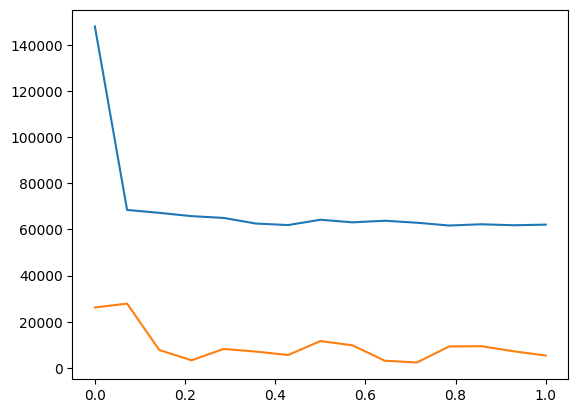

In [60]:
fig, ax = plt.subplots()
X = np.linspace(0, 1, 15)
Y1 = training_history.history['loss']
Y2 = training_history.history['val_loss']
ax.plot(X, Y1, X, Y2)
fig

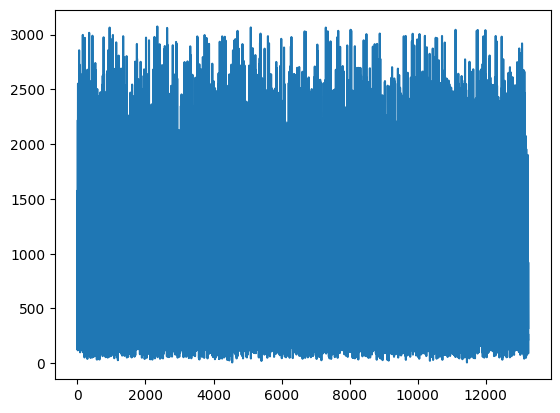

In [62]:
fig, ax = plt.subplots()
ax.plot(predictions)
fig

In [69]:
test?

In [68]:
y = test

In [93]:
Y_Real = test[0][1]
for i in range(1,len(test),1):
    Y_Real = np.concatenate((Y_Real, test[i][1]))

In [94]:
len(Y_Real)

13248

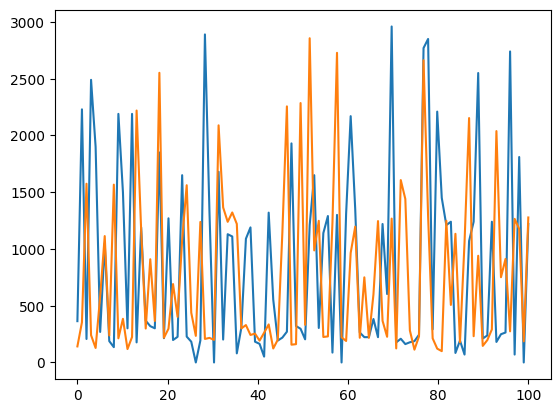

In [114]:
fig, ax = plt.subplots()
X = np.linspace(0, 100, 100)
Y1, Y2 = np.sin(X), np.cos(X)
ax.plot(X, Y_Real[:100], X, predictions[:100])
fig

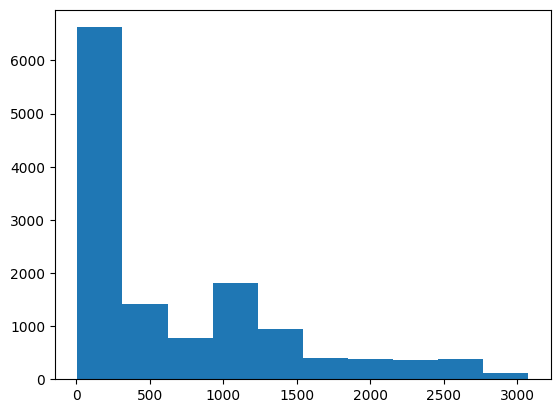

In [115]:
fig, ax = plt.subplots()
ax.hist(predictions)
fig

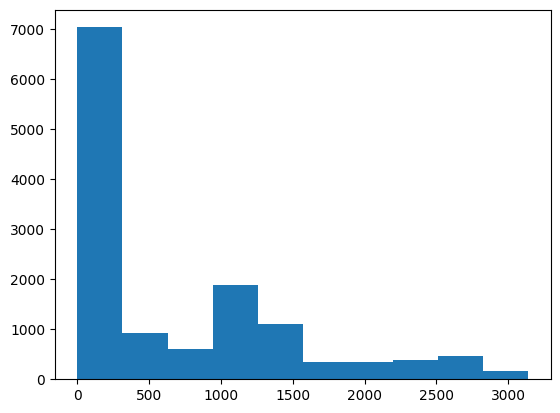

In [116]:
fig, ax = plt.subplots()
ax.hist(Y_Real)
fig